In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iris import irisRequests
import datetime

# Earthquakes

In [3]:
regions = {}
regions['japan'] = (30, 45.5, 129.5, 146)
regions['italy'] = (35,46,6, 19)

In [20]:
start_time = datetime.datetime(2012, 1, 1, 0, 0, 0)
end_time =  datetime.datetime(2016, 1, 1, 0, 0, 0)
for name, region in regions.items():
    download_url =irisRequests.url_events_box(start_time, end_time, region[0], region[1], region[2], region[3], minmag=3)
    df = pd.read_csv(download_url, sep="|", comment="#", parse_dates=["Time"])
    df.sort_values(by="Time", inplace=True)

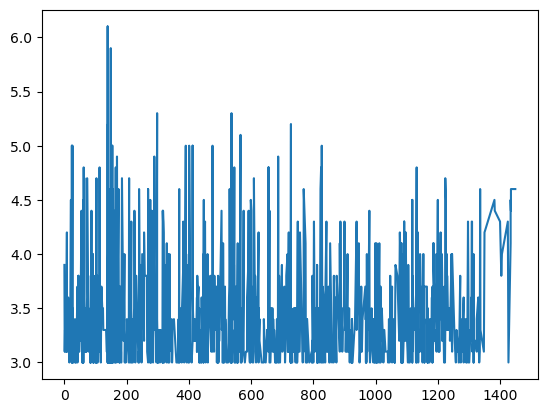

In [26]:
plt.plot((df.Time.values-df.Time.values[0]).astype('timedelta64[D]'),  )

# Waveforms

In [2]:
start_dt =  datetime.datetime(2016, 9, 30, 0, 0, 0)
end_dt = datetime.datetime(2016, 9, 30, 1, 0, 0)
data_url = irisRequests.url_data("3F", "INS2", start_dt,end_dt)
dfs = irisRequests.process_data_url(data_url)

/Users/vincenzo/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


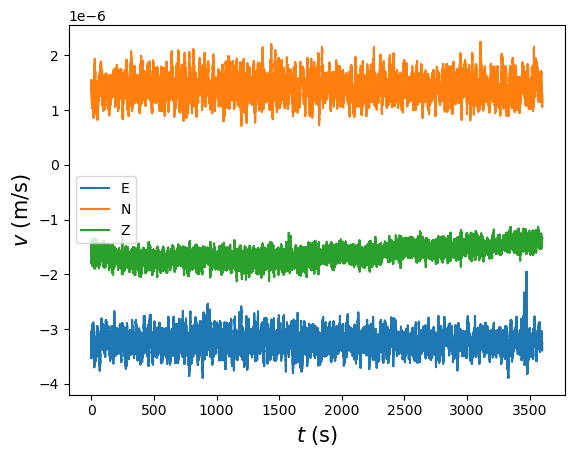

In [17]:
for channel, (df, header) in dfs.items():
    time_val = (df.Time.values - df.Time.values[0]).astype('timedelta64[s]')
    plt.plot(time_val, df.Sample.values, label="%s" % channel[-1] )
plt.xlabel("$t$ (s)", fontsize=15)
plt.ylabel("$v$ (m/s)", fontsize=15)
plt.legend(fontsize=10)
plt.show()